# 1. Import Library

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import pandas as pd
import numpy as np
import re 
import nltk 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold


from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import matplotlib.patches as mpatches

# 2. Data Load and Data Understanding

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jPWsijAqzPoC5VDfZBjJBvm2BPJyMVdL' -O Data.zip

--2021-12-16 12:20:32--  https://docs.google.com/uc?export=download&id=1jPWsijAqzPoC5VDfZBjJBvm2BPJyMVdL
Resolving docs.google.com (docs.google.com)... 172.217.13.238, 2607:f8b0:4004:829::200e
Connecting to docs.google.com (docs.google.com)|172.217.13.238|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/el8k5gnfri064qm73anphqhon122j7uo/1639657200000/17539190491766931577/*/1jPWsijAqzPoC5VDfZBjJBvm2BPJyMVdL?e=download [following]
--2021-12-16 12:20:32--  https://doc-0c-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/el8k5gnfri064qm73anphqhon122j7uo/1639657200000/17539190491766931577/*/1jPWsijAqzPoC5VDfZBjJBvm2BPJyMVdL?e=download
Resolving doc-0c-b4-docs.googleusercontent.com (doc-0c-b4-docs.googleusercontent.com)... 142.251.45.1, 2607:f8b0:4004:83e::2001
Connecting to doc-0c-b4-docs.googleusercontent.com (doc-0c-b4-docs.googleu

In [ ]:
import zipfile

#Lokasi file zip
file_path = '/content/Data.zip'

#Membaca file Zip
unzip = zipfile.ZipFile(file_path, 'r')
unzip.extractall('/content')
unzip.close()

In [ ]:
df_train = pd.read_csv("/content/train.txt", delimiter=';', header=None, names=['sentence','label'])
df_test = pd.read_csv("/content/test.txt", delimiter=';', header=None, names=['sentence','label'])
df_val = pd.read_csv("/content/val.txt", delimiter=';', header=None, names=['sentence','label'])

In [ ]:
#Menyatukan data validasi dengan data latih
frames = [df_train, df_val]
df = pd.concat(frames)
df = df.reset_index()
df = df.drop(columns = "index")

In [ ]:
df

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy


In [ ]:
#Melihat data yang hilang
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(df)

,Total,Percent
label,0,0.0
sentence,0,0.0


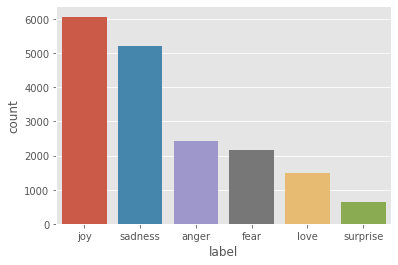

In [ ]:
#Melihat Sebaran Label
import seaborn as sns
sns.countplot(x ='label', data = df,order = df["label"].value_counts().index)
 
# Show the plot
plt.show()

In [ ]:
df_test

,sentence,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


# 3. Melakukan Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['label_enc'] = labelencoder.fit_transform(df['label'])
df_test['label_enc'] = labelencoder.transform(df_test['label'])

In [ ]:
map = df[['label','label_enc']].drop_duplicates(keep='first')
map

,label,label_enc
0,sadness,4
2,anger,0
3,love,3
6,surprise,5
7,fear,1
8,joy,2


In [ ]:
def relabel(a) :
  if a == 4 :
    o = "sadness"
  elif a == 0 :
    o = "anger"
  elif a == 3 :
    o = "love"
  elif a == 5 :
    o = "surprise"
  elif a == 1 :
    o = "fear"
  else :
    o = "joy"
  return o

In [ ]:
df_test[['label','label_enc']].drop_duplicates(keep='first')

,label,label_enc
0,sadness,4
3,joy,2
5,fear,1
6,anger,0
14,love,3
65,surprise,5


In [ ]:
# import nltk
# nltk.download('punkt')
# from nltk.stem.porter import PorterStemmer
# from nltk.tokenize.treebank import TreebankWordDetokenizer

# porter_stemmer = PorterStemmer()    

# sentence_stemm_train = []
# for i in range(df.shape[0]):
#     word_data = df.sentence[i]
#     nltk_tokens = nltk.word_tokenize(word_data)
#     word=[]
#     for w in nltk_tokens:
#         word.append(porter_stemmer.stem(w))
#     sentence = TreebankWordDetokenizer().detokenize(word)
#     sentence_stemm_train.append(sentence)

# sentence_stemm_test = []
# for i in range(df_test.shape[0]):
#     word_data = df_test.sentence[i]
#     nltk_tokens = nltk.word_tokenize(word_data)
#     word=[]
#     for w in nltk_tokens:
#         word.append(porter_stemmer.stem(w))
#     sentence = TreebankWordDetokenizer().detokenize(word)
#     sentence_stemm_test.append(sentence)

# df["sentence"] = np.array(sentence_stemm_train)
# df_test["sentence"] = np.array(sentence_stemm_test)

In [ ]:
# #Removing stopword
# nltk.download('stopwords')
# nltk.download('punkt')

# from nltk.corpus import stopwords
# from nltk.tokenize.treebank import TreebankWordDetokenizer

# df["Tokenize_Text"]=df.apply(lambda row: nltk.word_tokenize(df["sentence"]), axis=1)
# df_test["Tokenize_Text"]=df_test.apply(lambda row: nltk.word_tokenize(df_test["sentence"]), axis=1)

# def remove_stopwords(text):
#     stop_words = set(stopwords.words("english"))
#     filtered_text = [word for word in text if word not in stop_words]
#     sentence = TreebankWordDetokenizer().detokenize(filtered_text)
#     return sentence

# df["sentence"] = df["Tokenize_Text"].apply(remove_stopwords)
# df_test["sentence"] = df_test["Tokenize_Text"].apply(remove_stopwords)

In [ ]:
df['word'] = df['sentence'].str.split(' ')
df1 = pd.DataFrame({'word' :[]})
word_list = []
for sentence in df['word']:
    for word in sentence:
        word_list.append(word)
df1['word'] = word_list
C = pd.DataFrame(df1.groupby('word')['word'].count()).rename({'word' : 'document_frequency'}, axis=1).reset_index()

C[C["word"]=="wrong"]

,word,document_frequency
16034,wrong,78


# 4. Melakukan Ekstraksi Fitur dengan Tfidf

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, stop_words='english')

# We transform each text into a vector
features_train = tfidf.fit_transform(df.sentence).toarray()
features_test = tfidf.transform(df_test.sentence).toarray()

features_train_name = tfidf.get_feature_names()

labels = df.label_enc

print("Jumlah Feature Setelah di Ekstrak : "+str(features_train.shape[1]))

Jumlah Feature Setelah di Ekstrak : 3398


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
feature_train_df = pd.DataFrame(data=features_train,    # values,    # 1st column as index
                                columns=features_train_name)  # 1st row as the column names

In [ ]:
feature_train_df

,abandoned,abilities,ability,abit,able,absolute,absolutely,abuse,abused,accept,acceptable,acceptance,accepted,accepting,access,accident,accidentally,accomplish,accomplished,accomplishing,accomplishment,according,account,ache,achieve,achieved,aching,act,acted,acting,action,actions,active,actively,activities,activity,acts,actual,actually,ad,...,worthwhile,worthy,wouldn,wouldnt,wound,wow,wrapped,wrestling,write,writer,writers,writing,written,wrong,wronged,wrote,www,xd,ya,yall,yay,yeah,year,years,yell,yelling,yes,yesterday,yoga,york,youd,youll,young,younger,youre,youth,youtube,youve,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.394051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
feature_train_df["wrong"].describe()

count    18000.000000
mean         0.001557
std          0.025265
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.800219
Name: wrong, dtype: float64

# 5. MinMaxScaler Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train)

# 6. Modelling Menggunakan LinearSVC()

## 6.1 Cross Validation

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#mencoba beberapa algoritma machine learning

# models = [
#     RandomForestClassifier,
#     LinearSVC(),
#     MultinomialNB(),XGBClassifier()
# ]

models = [LinearSVC()]

# 5 Cross-validation
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features_train, labels, scoring='f1_macro', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'f1_macro'])

In [ ]:
mean_f1 = cv_df.groupby('model_name').f1_macro.mean()
std_f1 = cv_df.groupby('model_name').f1_macro.std()

f1 = pd.concat([mean_f1, std_f1], axis= 1, 
          ignore_index=True)
f1.columns = ['Mean F1_Macro', 'Standard deviation']
f1

,Mean F1_Macro,Standard deviation
model_name,,
LinearSVC,0.841194,0.00941


## 6.2 Mencoba untuk Memprediksi Data Testing dan Memprediksi Inputan Text

In [ ]:
model = LinearSVC()
model.fit(features_train, labels)
features_test = scaler.transform(features_test)
y_pred = model.predict(features_test)

In [ ]:
pred_cat = []
for i in y_pred:
  cat = relabel(i)
  pred_cat.append(cat)
pred_cat = np.array(pred_cat)

In [ ]:
print(classification_report(df_test.label, pred_cat))

              precision    recall  f1-score   support

       anger       0.86      0.86      0.86       275
        fear       0.86      0.83      0.85       224
         joy       0.89      0.91      0.90       695
        love       0.73      0.74      0.74       159
     sadness       0.92      0.91      0.91       581
    surprise       0.71      0.68      0.70        66

    accuracy                           0.87      2000
   macro avg       0.83      0.82      0.83      2000
weighted avg       0.87      0.87      0.87      2000



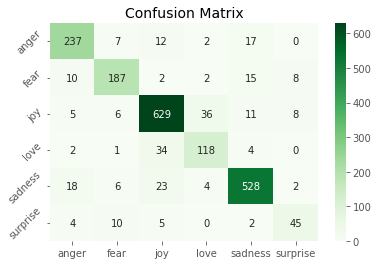

In [ ]:
#Result (Confusion Matric)
target_names = ['anger','fear','joy','love','sadness','surprise']

import seaborn as sn
confusion_mtx = confusion_matrix(df_test.label, pred_cat)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
ax.set_title('Confusion Matrix', size=14)
ax.set_xticklabels(target_names)
ax.set_yticklabels(target_names,rotation = 45)
plt.show()

In [ ]:
def predict_emotion(text):
  x = tfidf.transform([text]).toarray()
  x = scaler.transform(x)
  pred = relabel(model.predict(x))
  return pred

In [ ]:
text = "okay im okay, i want to play soccer in beach"
predict_emotion(text)

'joy'